In [ ]:
# shape of test data
X_test.shape

In [ ]:
%pip install imblearn

# Import Section

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from keras import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.models import load_model
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score



2023-11-08 04:56:16.398751: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 04:56:16.442875: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-08 04:56:17.182536: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Loading Dataset

In [26]:
FILE_PATH_TRAINING = "../dataset/UNSW_NB15_training-set.csv"
FILE_PATH_TESTING = "../dataset/UNSW_NB15_testing-set.csv"

df_training =   pd.read_csv(FILE_PATH_TRAINING, index_col=0)
df_testing =    pd.read_csv(FILE_PATH_TESTING, index_col=0)

In [19]:
df_training.shape, df_testing.shape

((175341, 44), (82332, 45))

In [21]:
df_training.head()

# print the columns
for idx, col in enumerate(df_training.columns):
    print(idx, col)

0 dur
1 proto
2 service
3 state
4 spkts
5 dpkts
6 sbytes
7 dbytes
8 rate
9 sttl
10 dttl
11 sload
12 dload
13 sloss
14 dloss
15 sinpkt
16 dinpkt
17 sjit
18 djit
19 swin
20 stcpb
21 dtcpb
22 dwin
23 tcprtt
24 synack
25 ackdat
26 smean
27 dmean
28 trans_depth
29 response_body_len
30 ct_srv_src
31 ct_state_ttl
32 ct_dst_ltm
33 ct_src_dport_ltm
34 ct_dst_sport_ltm
35 ct_dst_src_ltm
36 is_ftp_login
37 ct_ftp_cmd
38 ct_flw_http_mthd
39 ct_src_ltm
40 ct_srv_dst
41 is_sm_ips_ports
42 attack_cat
43 label


In [20]:
df_training.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
id,,,,,,,,,,,,,,,,,,,,,
1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,252,...,1,1,0,0,0,1,1,0,Normal,0
2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,62,...,1,2,0,0,0,1,6,0,Normal,0
3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,62,...,1,3,0,0,0,2,6,0,Normal,0
4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,62,...,1,3,1,1,0,2,1,0,Normal,0
5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,254,...,1,40,0,0,0,2,39,0,Normal,0


In [22]:
print(df_training.columns, sep="\n")

Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')


In [23]:
for col in df_training.columns:
    if 50 >=df_training[col].nunique() :
        print(col, df_training[col].nunique())

service 13
state 9
sttl 11
dttl 6
swin 13
dwin 7
trans_depth 11
ct_state_ttl 5
ct_dst_ltm 50
ct_src_dport_ltm 47
ct_dst_sport_ltm 32
is_ftp_login 4
ct_ftp_cmd 4
ct_flw_http_mthd 11
ct_src_ltm 50
is_sm_ips_ports 2
attack_cat 10
label 2


# EDA

In [4]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   proto              175341 non-null  object 
 3   service            175341 non-null  object 
 4   state              175341 non-null  object 
 5   spkts              175341 non-null  int64  
 6   dpkts              175341 non-null  int64  
 7   sbytes             175341 non-null  int64  
 8   dbytes             175341 non-null  int64  
 9   rate               175341 non-null  float64
 10  sttl               175341 non-null  int64  
 11  dttl               175341 non-null  int64  
 12  sload              175341 non-null  float64
 13  dload              175341 non-null  float64
 14  sloss              175341 non-null  int64  
 15  dloss              175341 non-null  int64  
 16  si

In [5]:
df_training.describe()
# before log transformation

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,...,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,87671.000000,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,...,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,50616.731112,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,...,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,43836.000000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,87671.000000,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,131506.000000,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,...,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,175341.000000,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,...,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [ ]:
df_training.describe()
# After log transformation

In [ ]:
def plot_normal_distribution(df):
    for column in df.columns:
        sns.displot(df[column])
        plt.show()
        
plot_normal_distribution(df_training)

# Data Preprocessing

## Removing columns

In [25]:
columns_to_remove = ['proto','state','service','attack_cat']
df_training.drop(columns_to_remove, axis=1, inplace=True)
df_testing.drop(columns_to_remove, axis=1,inplace=True)


### Remove columns for multi-class classification

In [28]:
columns_to_remove = ['proto','state','service','label']
df_training.drop(columns_to_remove, axis=1, inplace=True)
df_testing.drop(columns_to_remove, axis=1,inplace=True)

## Log Modification

In [29]:
for column in df_training.columns:
    if column !='label' and df_training[column].nunique() > 50:
        df_training[column] = np.log(df_training[column]+1)
        df_testing[column] = np.log(df_testing[column]+1)
    

## Data Standardization

In [30]:
standard_scaler = StandardScaler()

for column in df_training.columns:
    if column != 'label' and column != 'attack_cat':
        standard_scaler.fit(df_training[column].values.reshape(-1,1))
        df_training[column] = standard_scaler.transform(df_training[column].values.reshape(-1,1))
        df_testing[column] = standard_scaler.transform(df_testing[column].values.reshape(-1,1))

In [31]:
# after standardization
df_training.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
count,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,...,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05,1.753410e+05
mean,-2.463828e-17,-2.334152e-16,-1.867322e-16,7.780508e-18,1.945127e-16,-9.855310e-17,-1.607972e-16,-1.141141e-16,2.230412e-16,-2.593503e-17,...,1.115206e-16,9.336610e-17,3.630904e-17,4.460825e-16,-6.483757e-18,-6.483757e-18,-5.187005e-18,3.630904e-17,3.942124e-16,5.576031e-17
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-5.172943e-01,-1.162850e+00,-8.966151e-01,-1.763954e+00,-9.665093e-01,-1.891934e+00,-1.744196e+00,-7.204059e-01,-2.985984e+00,-9.692400e-01,...,-6.450129e-01,-5.447364e-01,-5.543732e-01,-1.064936e+00,-1.185902e-01,-1.185902e-01,-1.897681e-01,-7.157137e-01,-1.167162e+00,-1.265080e-01
25%,-5.172821e-01,-8.085943e-01,-8.966151e-01,-9.319330e-01,-9.665093e-01,-1.044313e+00,-1.141901e+00,-7.204059e-01,-9.544468e-01,-9.692400e-01,...,-6.450129e-01,-5.447364e-01,-5.543732e-01,-1.064936e+00,-1.185902e-01,-1.185902e-01,-1.897681e-01,-5.955426e-01,-7.478987e-01,-1.265080e-01
50%,-5.148791e-01,-8.085943e-01,-1.888374e-01,-1.340109e-01,3.222099e-01,5.353285e-02,7.232680e-01,-4.579780e-01,-5.186542e-02,2.859528e-01,...,-5.208272e-01,-5.447364e-01,-5.543732e-01,-3.629182e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,-4.753715e-01,-2.196893e-01,-1.265080e-01
75%,2.644889e-01,4.725493e-01,6.482218e-01,5.856538e-01,8.017225e-01,9.340900e-01,7.232680e-01,1.560002e+00,9.375684e-01,7.958433e-01,...,1.001016e-01,-4.766180e-02,-2.085659e-01,8.308206e-01,-1.185902e-01,-1.185902e-01,-1.897681e-01,2.456551e-01,7.683391e-01,-1.265080e-01
max,5.763772e+00,6.244529e+00,5.097057e+00,6.093708e+00,3.198105e+00,1.434814e+00,7.329824e-01,1.578100e+00,1.840084e+00,1.949832e+00,...,5.564275e+00,5.668697e+00,7.226290e+00,2.476318e+00,3.161543e+01,3.161543e+01,4.259369e+01,6.374381e+00,2.400231e+00,7.904641e+00


# Train Test Split

## Splitting

In [6]:
X_train = df_training.drop('label', axis=1)
y_train = df_training['label']

X_test = df_testing.drop('label', axis=1)
y_test = df_testing['label']



### Spliting for multiclass classification

In [32]:
X_train = df_training.drop('attack_cat', axis=1)
y_train = df_training['attack_cat']

X_test = df_testing.drop('attack_cat', axis=1)
y_test = df_testing['attack_cat']

### Encoding for multiclass classification

In [39]:
X_train.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports
id,,,,,,,,,,,,,,,,,,,,,
1,-0.342123,-0.068307,0.140261,-0.441590,0.334160,-0.852011,0.703839,1.578100,-0.937019,0.591119,...,-0.645013,-0.544736,-0.554373,-1.064936,-0.118590,-0.118590,-0.189768,-0.715714,-1.167162,-0.126508
2,0.247757,0.597577,1.463624,0.188354,1.720441,-0.838341,-1.141901,1.560002,-1.049058,1.295137,...,-0.645013,-0.544736,-0.554373,-0.654282,-0.118590,-0.118590,-0.189768,-0.715714,0.128233,-0.126508
3,0.956178,0.151267,0.928674,-0.234394,1.427966,-1.237125,-1.141901,1.560002,-1.408041,0.930891,...,-0.520827,-0.544736,-0.554373,-0.362918,-0.118590,-0.118590,-0.189768,-0.595543,0.128233,-0.126508
4,0.989886,0.472549,0.755846,0.094296,0.711339,-1.245081,-1.141901,1.560002,-1.289018,0.431105,...,-0.520827,-0.544736,-0.554373,-0.362918,7.814915,7.814915,-0.189768,-0.595543,-1.167162,-0.126508
5,0.049848,0.326594,0.357032,-0.003462,0.445572,-1.040160,0.723268,1.560002,-1.044852,0.460678,...,-0.520827,-0.420468,-0.554373,1.994143,-0.118590,-0.118590,-0.189768,-0.595543,1.930517,-0.126508


In [87]:
y_train[:50]

array([6, 3, 5, 4, 5, 5, 3, 3, 7, 5, 6, 2, 4, 4, 6, 6, 6, 5, 3, 3, 4, 3,
       6, 5, 3, 6, 6, 5, 4, 4, 2, 7, 3, 6, 6, 6, 6, 3, 0, 6, 4, 6, 3, 7,
       5, 0, 6, 6, 6, 6])

In [37]:
# encode attack_cat using label encoder
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.transform(y_test)


# y_train = pd.get_dummies(y_train)
# y_test = pd.get_dummies(y_test)


In [50]:
f={}
for i in range(len(y_train)):
    if y_train[i] not in f:
        f[y_train[i]]=1
    else:
        f[y_train[i]]+=1
print(f)

{6: 44831, 0: 1607, 3: 26621, 2: 9894, 5: 31921, 7: 8393, 4: 14614, 8: 900, 1: 1386, 9: 105}


In [52]:
# Calculate class weights to handle class imbalance
class_counts = np.bincount(y_train)
class_weights = dict(enumerate((max(class_counts) / class_counts).astype(float)))
print(class_weights)


{0: 27.897324206596142, 1: 32.34559884559884, 2: 4.5311299777643015, 3: 1.6840464295105368, 4: 3.0676748323525387, 5: 1.40443595125466, 6: 1.0, 7: 5.341475038722745, 8: 49.812222222222225, 9: 426.96190476190475}


### Random Oversampling for multiclass classification

In [51]:
from imblearn.over_sampling import RandomOverSampler

# Create a RandomOverSampler object
oversampler = RandomOverSampler()

# Fit and transform the data
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)


In [ ]:
X_train, y_train = X_train_oversampled, y_train_oversampled

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

## Validation split

In [53]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [54]:
X_train.shape,y_train.shape,X_val.shape,y_val.shape

((112217, 39), (112217,), (28055, 39), (28055,))

In [65]:
from sklearn.ensemble import RandomForestClassifier

# Fit a Random Forest model using class weights
rf = RandomForestClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=False)
rf.fit(X_train, y_train)



[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomForestClassifier(criterion='entropy', n_jobs=50, random_state=42,
                       verbose=1)

In [66]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.


Accuracy: 0.7495263081183501


[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.2s finished


              precision    recall  f1-score   support

           0       0.01      0.01      0.01       677
           1       0.10      0.21      0.14       583
           2       0.37      0.08      0.13      4089
           3       0.56      0.83      0.67     11132
           4       0.27      0.53      0.36      6062
           5       0.99      0.97      0.98     18871
           6       0.96      0.74      0.84     37000
           7       0.84      0.80      0.82      3496
           8       0.28      0.61      0.39       378
           9       0.56      0.68      0.61        44

    accuracy                           0.75     82332
   macro avg       0.49      0.55      0.49     82332
weighted avg       0.81      0.75      0.76     82332



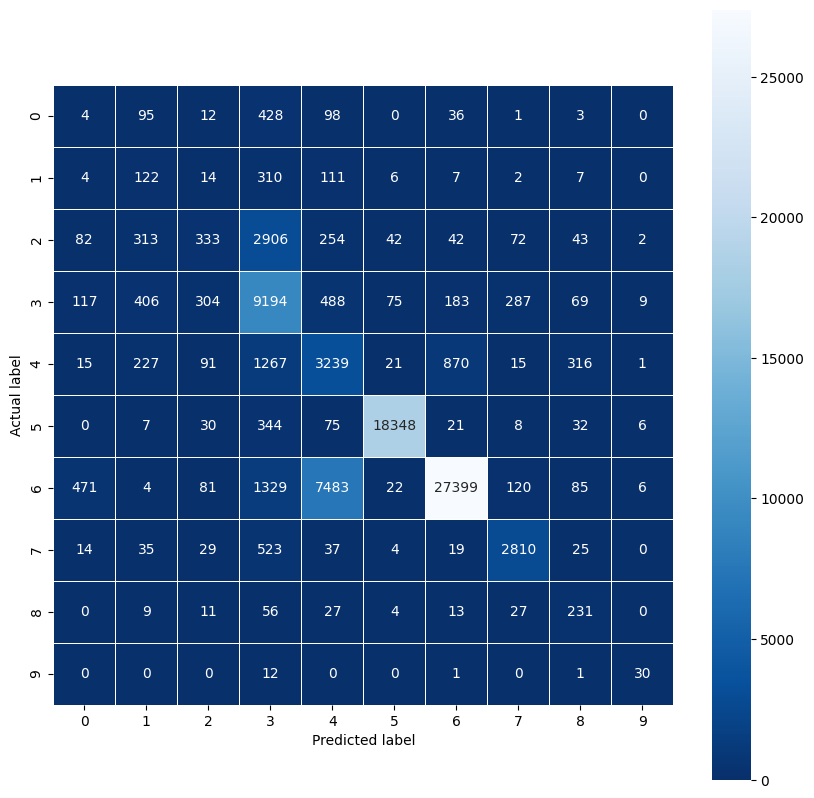

In [67]:
print(classification_report(y_test, y_pred))
# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');


In [68]:

# Get feature importances
feature_importances = rf.feature_importances_

In [44]:
feature_importances

array([2.53301689e-02, 9.38280637e-03, 1.49808360e-02, 4.24626549e-02,
       3.48146291e-02, 4.63444468e-02, 1.47269875e-01, 5.25307784e-02,
       4.84680088e-02, 6.67049909e-02, 1.18438815e-02, 8.80576954e-03,
       2.82458444e-02, 3.22511137e-02, 1.40812990e-02, 1.09714324e-02,
       8.03620835e-03, 8.42620438e-03, 8.05522186e-03, 2.33623927e-04,
       2.57836069e-02, 2.18951245e-02, 2.04871041e-02, 4.02369029e-02,
       3.05743252e-02, 1.66711928e-03, 1.58309908e-03, 2.61853875e-02,
       1.03636426e-01, 9.82160136e-03, 8.54517308e-03, 1.94236262e-02,
       2.60861343e-02, 7.61478011e-05, 7.49643097e-05, 1.84389046e-03,
       8.93104287e-03, 2.86061618e-02, 5.30236777e-03])

In [69]:
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': feature_importances}).sort_values('importance', ascending = False)


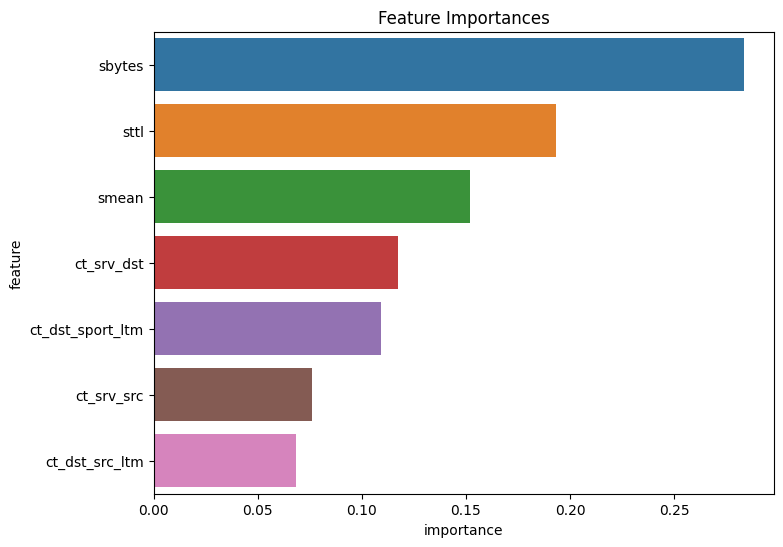

In [70]:
# plot feature importances
plt.figure(figsize = (8, 6))
sns.barplot(x = 'importance', y = 'feature', data = feature_importances)
plt.title('Feature Importances')
plt.show()


In [61]:
# select features with importance greater than 0.01
selected_features = feature_importances[feature_importances['importance'] > 0.05]['feature'].values


In [62]:
# total number of features selected vs total number of features
len(selected_features), X_train.shape[1]

(7, 39)

In [63]:
# new training and testing data with selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_val = X_val[selected_features]

In [64]:
X_train.shape,X_test.shape,X_val.shape,y_train.shape,y_test.shape,y_val.shape

((112217, 7), (82332, 7), (28055, 7), (112217,), (82332,), (28055,))

# Model ANN

## Model

In [73]:
def get_model_ann():
  model = Sequential()
  model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

def get_model_ann_multiclass():
  model = Sequential()
  model.add(Dense(50, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(25, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# model_ann = get_model_ann()  
model_ann = get_model_ann_multiclass()

## Train

In [75]:
history_ann = model_ann.fit(X_train, y_train, epochs=50, batch_size=256, verbose=1, validation_data=(X_val, y_val))


Epoch 1/50


2023-11-08 05:11:50.599790: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f2b50a0b550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-08 05:11:50.599853: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-11-08 05:11:50.599867: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2023-11-08 05:11:50.599877: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
2023-11-08 05:11:50.609014: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-08 05:11:50.772409: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-08 05:11:50.932157: I ./tensorflow/compiler/jit/device_compiler.h:186] Compi

439/439 [==============================] - 4s 5ms/step - loss: 0.9819 - accuracy: 0.6655 - val_loss: 0.7284 - val_accuracy: 0.7479
Epoch 2/50
439/439 [==============================] - 2s 5ms/step - loss: 0.6802 - accuracy: 0.7598 - val_loss: 0.6695 - val_accuracy: 0.7627
Epoch 3/50
439/439 [==============================] - 2s 5ms/step - loss: 0.6424 - accuracy: 0.7697 - val_loss: 0.6467 - val_accuracy: 0.7683
Epoch 4/50
439/439 [==============================] - 2s 5ms/step - loss: 0.6211 - accuracy: 0.7743 - val_loss: 0.6302 - val_accuracy: 0.7690
Epoch 5/50
439/439 [==============================] - 2s 5ms/step - loss: 0.6056 - accuracy: 0.7755 - val_loss: 0.6160 - val_accuracy: 0.7731
Epoch 6/50
439/439 [==============================] - 2s 5ms/step - loss: 0.5943 - accuracy: 0.7776 - val_loss: 0.6052 - val_accuracy: 0.7738
Epoch 7/50
439/439 [==============================] - 2s 5ms/step - loss: 0.5858 - accuracy: 0.7797 - val_loss: 0.5980 - val_accuracy: 0.7750
Epoch 8/50
439/43

## Predict

In [15]:
# load model
model_ann = load_model('models/saved_models/model_ann_20231103-112820_0.887.keras')

### Binary prediction

In [76]:
y_prediction_ann = model_ann.predict(X_test)


2573/2573 [==============================] - 3s 1ms/step


In [19]:
threshold = 0.5
y_prediction_ann = np.where(y_prediction_ann > threshold, 1, 0)

In [20]:
accuracyScore_ann = accuracy_score(y_test, y_prediction_ann)
print("ANN Accuracy: ", accuracyScore_ann)

ANN Accuracy:  0.8532283923626294


In [21]:
loss, accuracy = model_ann.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy*100))
print('Loss: %f' % (loss*100))

2573/2573 [==============================] - 21s 8ms/step - loss: 0.2809 - accuracy: 0.8532
Accuracy: 85.322839
Loss: 28.093141


### Multi ClassPredicition


In [78]:
y_prediction_ann_multiclass = np.argmax(y_prediction_ann, axis=1)

In [79]:
# calculate accuracy
accuracyScore_ann = accuracy_score(y_test, y_prediction_ann_multiclass)
print("ANN Accuracy with multiclass: ", accuracyScore_ann)

ANN Accuracy with multiclass:  0.6614803478598844


### Plot graph of probability of each class

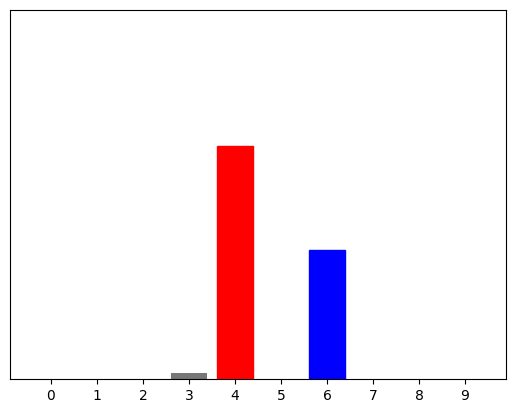

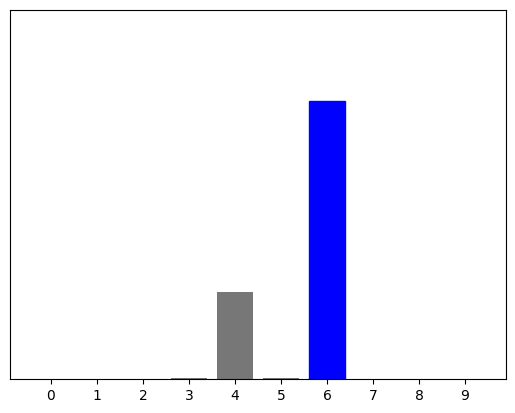

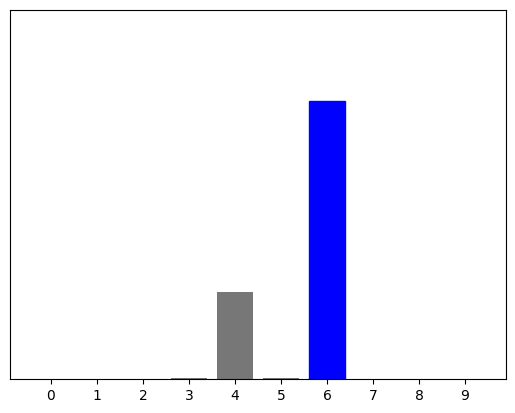

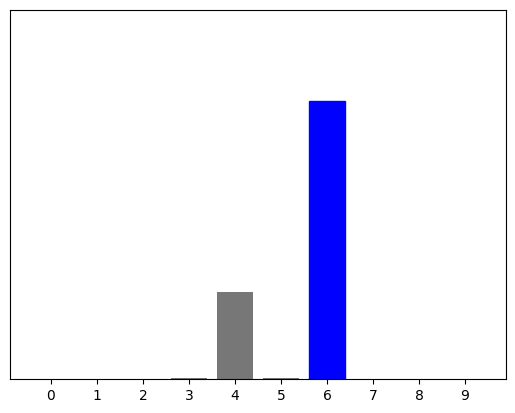

In [80]:
def plot_probabilities(y_prediction_array, true_label,predicted_label=None):
  if predicted_label is None:
    predicted_label = np.argmax(y_prediction_array)
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), y_prediction_array, color="#777777")
  plt.ylim([0, 1])
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  plt.show()


for i in range(56, 60):
  plot_probabilities(y_prediction_ann[i], y_test[i], y_prediction_ann_multiclass[i])

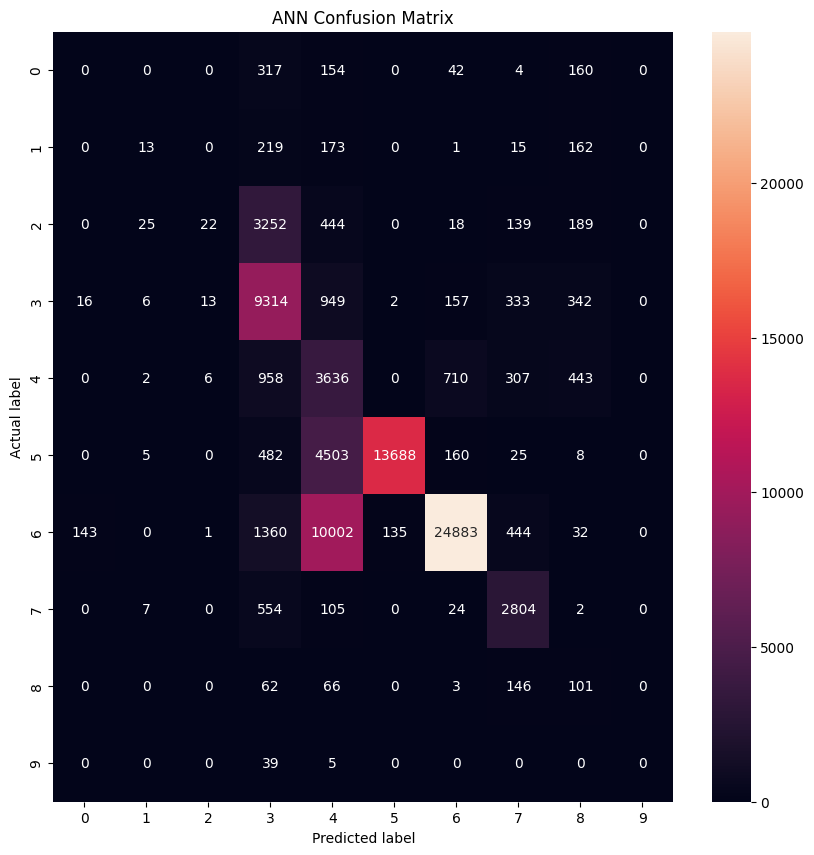

In [81]:
def plot_confusion_matrix(y_test, y_prediction, title):
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()
plot_confusion_matrix(y_test, y_prediction_ann_multiclass, "ANN Confusion Matrix")

### Predict for multi-class classification

In [82]:
# save model with time and accuracy
import datetime
model_ann.save('model_ann_'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'_'+str(accuracyScore_ann)[0:5]+'.h5')

/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Confusion Matrix

In [83]:
print(classification_report(y_test, y_prediction_ann))

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [84]:
## give confusion matrix
cm_ann = confusion_matrix(y_test, y_prediction_ann)
##  plot it
plt.figure(figsize=(10,10))
plt.title('ANN Confusion Matrix')
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

## Roc Curve

In [85]:
fpr, tpr, thresholds = roc_curve(y_test, y_prediction_ann)
roc_auc = auc(fpr, tpr)



ValueError: multiclass format is not supported

In [86]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)


NameError: name 'fpr' is not defined

<Figure size 640x480 with 0 Axes>

# Random Forest

In [62]:

rf = RandomForestClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=True)

rf.fit(X_train, y_train)

[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomForestClassifier(criterion='entropy', n_jobs=50, random_state=42,
                       verbose=1, warm_start=True)

In [63]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.794891415245591


[Parallel(n_jobs=50)]: Using backend ThreadingBackend with 50 concurrent workers.
[Parallel(n_jobs=50)]: Done 100 out of 100 | elapsed:    0.1s finished


# XGBoost

In [ ]:
# write code for xgboost
xgb = XGBClassifier(n_estimators=100, n_jobs=50, random_state=42, verbose=1, criterion='entropy',warm_start=True)
xgb.fit(X_train, y_train)


In [ ]:
#predict
y_pred = xgb.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


# LSTM

In [65]:
def get_model_lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(25, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(10))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

model_lstm = get_model_lstm()


2023-11-02 07:02:12.260809: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5329 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:3b:00.0, compute capability: 7.5
2023-11-02 07:02:12.262956: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 220 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:af:00.0, compute capability: 7.5
2023-11-02 07:02:12.264834: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 5099 MB memory:  -> device: 2, name: Tesla T4, pci bus id: 0000:d8:00.0, compute capability: 7.5


In [66]:
# reshape data for LSTM
X_train = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))


In [1]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

NameError: name 'X_train' is not defined

In [68]:
# fit model
history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=1024, verbose=1, validation_data=(X_val, y_val))

Epoch 1/100


2023-11-02 07:02:19.420077: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-11-02 07:02:19.723367: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f1f0c013090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-02 07:02:19.723443: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-11-02 07:02:19.723467: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
2023-11-02 07:02:19.723482: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (2): Tesla T4, Compute Capability 7.5
2023-11-02 07:02:19.731008: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-02 07:02:19.895518: I ./tensorflow/compiler/jit/device_compiler.h:186] Compi

110/110 [==============================] - 10s 32ms/step - loss: 0.4840 - accuracy: 0.8814 - val_loss: 0.3221 - val_accuracy: 0.9219
Epoch 2/100
110/110 [==============================] - 3s 23ms/step - loss: 0.2797 - accuracy: 0.9223 - val_loss: 0.2557 - val_accuracy: 0.9219
Epoch 3/100
110/110 [==============================] - 3s 24ms/step - loss: 0.2530 - accuracy: 0.9223 - val_loss: 0.2354 - val_accuracy: 0.9219
Epoch 4/100
110/110 [==============================] - 3s 23ms/step - loss: 0.2321 - accuracy: 0.9223 - val_loss: 0.2223 - val_accuracy: 0.9219
Epoch 5/100
110/110 [==============================] - 3s 24ms/step - loss: 0.2253 - accuracy: 0.9224 - val_loss: 0.2198 - val_accuracy: 0.9219
Epoch 6/100
110/110 [==============================] - 3s 24ms/step - loss: 0.2233 - accuracy: 0.9223 - val_loss: 0.2178 - val_accuracy: 0.9219
Epoch 7/100
110/110 [==============================] - 3s 25ms/step - loss: 0.2209 - accuracy: 0.9223 - val_loss: 0.2177 - val_accuracy: 0.9219
Epo

In [69]:
# evaluate model on test data
y_prediction_lstm = model_lstm.predict(X_test)

threshold = 0.5

y_prediction_lstm = np.where(y_prediction_lstm > threshold, 1, 0)

accuracyScore_lstm = accuracy_score(y_test, y_prediction_lstm)

print("LSTM Accuracy: ", accuracyScore_lstm)



2573/2573 [==============================] - 19s 7ms/step
LSTM Accuracy:  0.7663241509983967


In [70]:
# save model with time and accuracy
import datetime
model_lstm.save('model_lstm_'+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'_'+str(accuracyScore_lstm)[0:5]+'.h5')

/home/sukhmeet/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [71]:
# evaluate model on test data
loss_lstm, accuracy_lstm = model_lstm.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %f' % (accuracy_lstm*100))
print('Loss: %f' % (loss_lstm*100))

   6/2573 [..............................] - ETA: 28s - loss: 1.4393 - accuracy: 0.0417 

2573/2573 [==============================] - 28s 11ms/step - loss: 0.4596 - accuracy: 0.7663
Accuracy: 76.632416
Loss: 45.959011


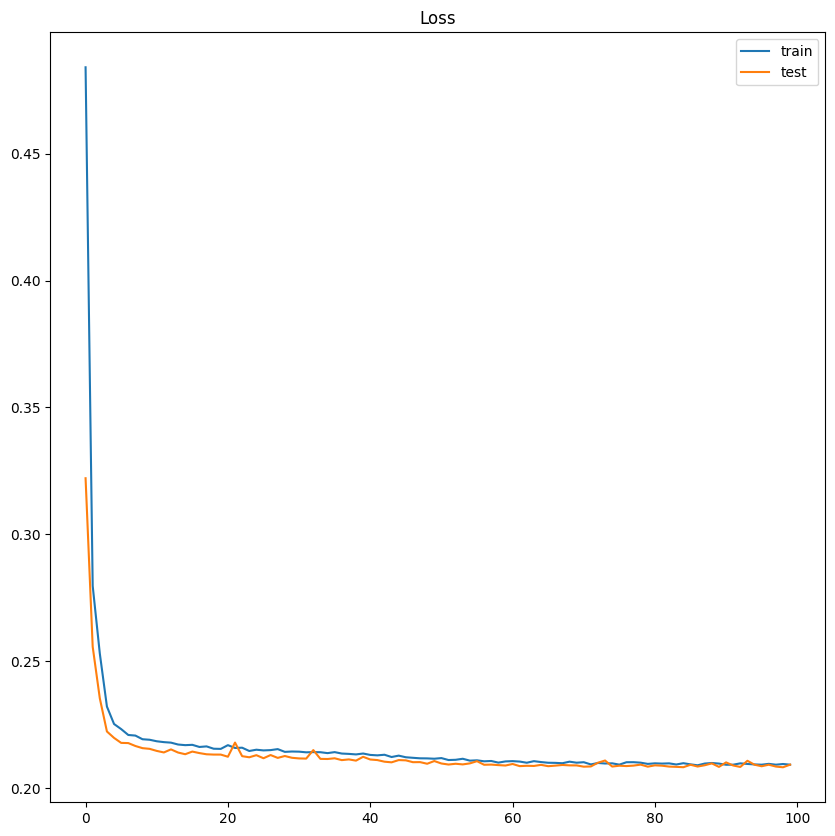

In [72]:
# plot loss during training
plt.figure(figsize=(10, 10))
plt.title('Loss')
plt.plot(history_lstm.history['loss'], label='train')
plt.plot(history_lstm.history['val_loss'], label='test')
plt.legend()
plt.show()


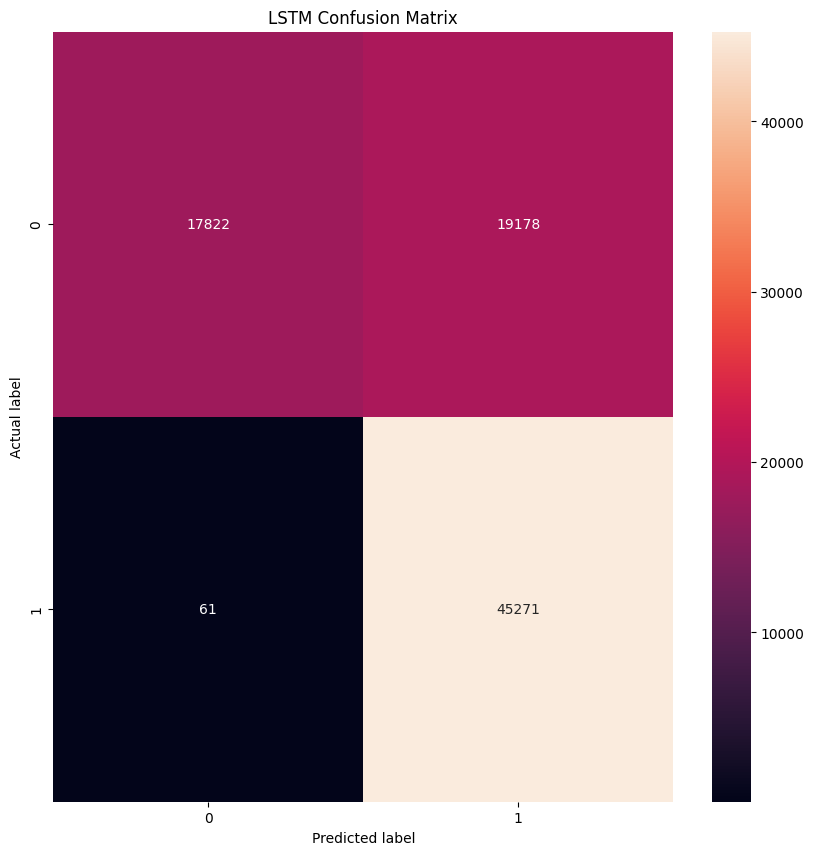

In [75]:
# confusion matrix
def plot_confusion_matrix(y_test, y_prediction, title):
    cm = confusion_matrix(y_test, y_prediction)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(title)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

plot_confusion_matrix(y_test, y_prediction_lstm, "LSTM Confusion Matrix")
